In [62]:
import os
import glob
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [63]:
# helpers

def printLoadingScores(pca, index, component):
    # prints loading scores for a given principal component 
    loadingScores = pd.Series(pca.components_[component], index=index).sort_values(ascending=False, key=abs)
    print(loadingScores[loadingScores[0:19].index.values])
    

In [64]:
# Read and merge all cleaned data into a single data frame

df = pd.read_csv('./Data/Cleaned/AllData.csv')

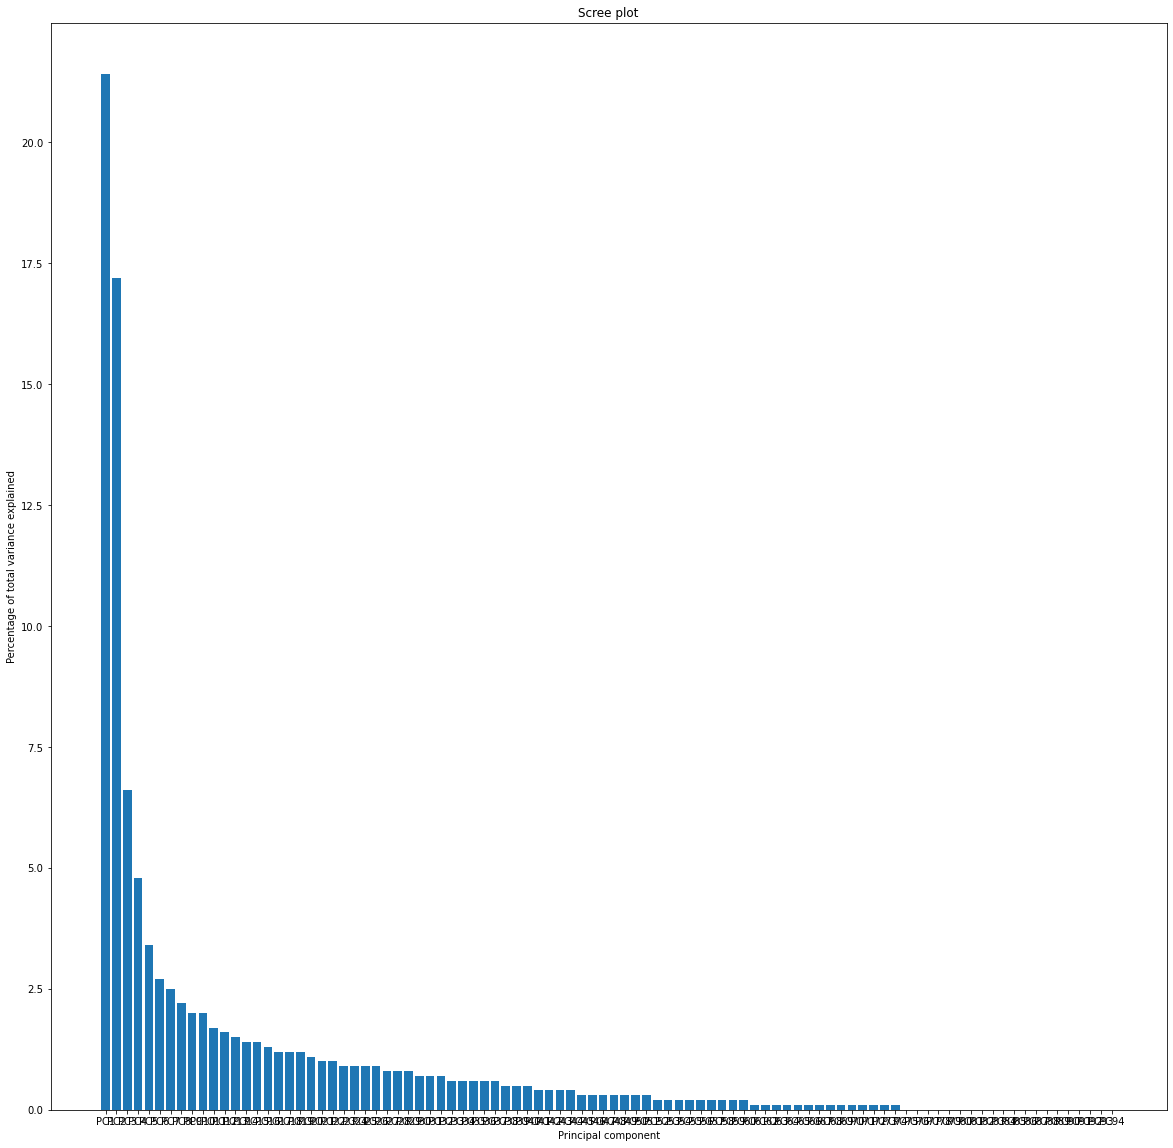

In [65]:
# drop non-numeric and unwanted coloumns
tempDf = df.drop(["Unnamed: 0", "Player", "Team"], axis=1)

# shift data mean to origin and scale variance in each feature to 1
scaledDf = preprocessing.scale(tempDf)

# perform pca
pca = PCA()
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

# find percentage of variance accounted for by principal componenets
varPercent = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# create scree plot
labels = ['PC' + str(i) for i in range(1, len(varPercent) + 1)]

plt.figure(figsize = (20,20))
plt.bar(x=labels, height=varPercent)
plt.ylabel('Percentage of total variance explained')
plt.xlabel('Principal component')
plt.title("Scree plot")
plt.show()


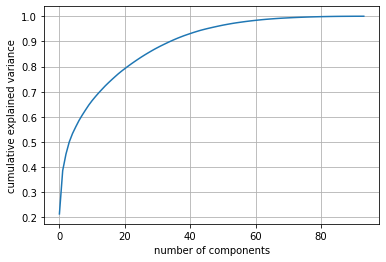

In [66]:
# get cumulative explained variance plot by number of principal components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [ ]:
print(sum(varPercent[:5]))

In [67]:
# We use 5 principal components to balance variance explaining power and interpretability of our components
# re-run pca keeping only top 5 components
pca = PCA(5)
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

In [68]:
# re-insert players and teams to make a new data frame

pcaDf = pd.DataFrame(pcaData, columns=labels[0:5])
pcaDf = pcaDf[labels[0:5]]
pcaDf["Player"] = df["Player"]
pcaDf["Team"] = df["Team"]

pcaDf.head()

,PC1,PC2,PC3,PC4,PC5,Player,Team
0,-7.989976,7.172228,-3.494397,-2.383515,-1.511902,Stephen Curry,GSW
1,-4.275016,7.960160,-2.488428,-4.343693,-1.695037,Bradley Beal,WAS
2,-9.065379,8.188754,-0.748121,-4.408168,1.040886,Damian Lillard,POR
3,6.894107,15.573695,-3.977882,2.099893,6.357913,Joel Embiid,PHI
4,0.724766,12.020710,2.112283,-1.421188,0.619788,Giannis Antetokounmpo,MIL


In [69]:
# PC1

printLoadingScores(pca, tempDf.columns, 0)
pcaDf.nlargest(10, "PC1")

OREB%               0.187447
AvgDribPerTouch    -0.181573
PaintTouches        0.175732
PaintTouch FGM      0.172635
ContestedDREB%      0.169461
%BLK                0.168198
DrivePASS          -0.165807
ASTToPass%         -0.165472
DriveAST           -0.164450
PaintTouch FTM      0.163676
AVG DREBDistance   -0.159122
AVG OREBDistance   -0.156329
%DREB               0.152248
3FGM%UAST          -0.150984
DREB%               0.150381
ContestedOREB%      0.147396
Pull UpFGM         -0.145393
AST%               -0.143793
Pull Up3PM         -0.142848
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
94,11.513312,6.626596,2.084663,0.625806,-2.414124,Rudy Gobert,UTA
82,11.318808,5.573520,3.059537,0.375974,-2.077251,Clint Capela,ATL
232,9.938028,1.897987,1.142584,-3.508846,1.977424,Hassan Whiteside,SAC
274,9.813945,0.339420,2.073331,-3.301602,-1.523898,Daniel Gafford,WAS
219,9.802735,1.978588,1.278993,-5.875358,-1.035571,Moses Brown,BOS
122,9.702833,5.037516,0.713729,0.417850,-0.203872,Jarrett Allen,CLE
86,9.626357,7.526883,4.377155,0.690858,0.491587,Andre Drummond,LAL
91,9.355836,6.413527,-0.119648,1.959049,1.034899,Deandre Ayton,PHX
258,9.203250,1.573657,4.101571,-2.103140,-0.024970,DeAndre Jordan,BKN
369,9.130280,-1.513615,2.923817,-5.307735,0.223253,Onyeka Okongwu,ATL


In [70]:
# PC2

printLoadingScores(pca, tempDf.columns, 1)
pcaDf.nlargest(10, "PC2")

FGM                0.221860
PIE                0.213840
FTM                0.211156
Front CTTouches    0.206589
USG%               0.187025
PassesMade         0.183347
OPPPTSPAINT        0.179109
OPPPTSOFFTOV       0.172357
PostTouchFGM       0.155912
DriveFTM           0.154857
AvgSpeedDef       -0.151457
POSS               0.151356
PostTouchTO        0.151007
DriveFGM           0.150146
PostTouchFTM       0.148471
PostTouchAST       0.146945
SecondaryAST       0.145677
ElbowTouches       0.144285
Pull UpFGM         0.143205
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
3,6.894107,15.573695,-3.977882,2.099893,6.357913,Joel Embiid,PHI
12,3.870944,14.885888,0.258258,6.795489,3.825666,Nikola Jokic,DEN
4,0.724766,12.020710,2.112283,-1.421188,0.619788,Giannis Antetokounmpo,MIL
5,-6.835815,11.478786,2.553040,-4.322831,1.186491,Luka Doncic,DAL
40,5.198665,11.178470,1.117533,5.552475,-0.088036,Domantas Sabonis,IND
18,4.800965,11.112378,-3.349227,2.520097,2.284885,Karl-Anthony Towns,MIN
22,-1.795494,10.526367,-1.056220,2.977180,0.857888,Julius Randle,NYK
29,-6.437220,10.489856,5.832492,0.935070,-0.011123,Russell Westbrook,WAS
20,-8.659451,10.229271,4.508561,-1.395939,0.614107,James Harden,BKN
25,2.926927,9.581662,-4.137234,6.255377,4.150599,Nikola Vucevic,CHI


In [71]:
# PC3

printLoadingScores(pca, tempDf.columns, 2)
pcaDf.nlargest(10, "PC3")

C&SFGM             -0.298078
PTSPerTouch        -0.265145
AST Ratio           0.246902
3PM                -0.225156
3P%                -0.218890
%FGA2PT             0.197059
C&S3P%             -0.194933
TO Ratio            0.194332
FGM%UAST            0.190785
FGM%AST            -0.190768
3FGM%AST           -0.181250
AST%                0.178311
C&SFG%             -0.162654
PaintTouch PASS%    0.162272
PaintTouch PTS%    -0.161223
STL%                0.157503
AvgDribPerTouch     0.140483
FT%                -0.138977
PaintTouch AST%     0.130273
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
396,5.570123,-2.426701,7.449094,-0.379716,0.929380,Ed Davis,MIN
218,-6.201096,0.280108,6.935713,2.786361,-1.751932,T.J. McConnell,IND
393,-3.986346,-4.508574,6.037760,2.070719,4.556163,Matthew Dellavedova,CLE
29,-6.437220,10.489856,5.832492,0.935070,-0.011123,Russell Westbrook,WAS
171,6.950106,4.878465,5.574219,2.401260,-1.025075,Mason Plumlee,DET
333,-5.067304,-1.828572,5.331704,2.279525,3.389438,Rajon Rondo,LAC
272,-0.564362,3.945021,5.117888,6.944597,-2.175223,Draymond Green,GSW
353,7.175061,-1.610757,5.092559,0.160382,-2.143128,Bismack Biyombo,CHA
286,-5.725539,-1.618883,5.070081,1.203906,-0.958952,Killian Hayes,DET
253,7.319946,2.078600,4.944187,0.459945,-1.154605,Steven Adams,NOP


In [72]:
# PC4

printLoadingScores(pca, tempDf.columns, 3)
pcaDf.nlargest(10, "PC4")

DEFWS               0.197061
PTSPerTouch        -0.189447
DrivePASS%          0.188149
NETRTG              0.181913
%PTSFT             -0.181399
AGE                 0.176447
AST Ratio           0.174097
PostTouchAST        0.169863
DrivePTS%          -0.162550
C&SFGM              0.160307
DriveFTM           -0.159071
DEF RTG            -0.156299
FGM%AST             0.154905
FGM%UAST           -0.154894
PaintTouch PASS%    0.154544
DriveFGM           -0.149735
USG%               -0.142948
DriveAST%           0.142618
PaintTouch AST      0.141663
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
272,-0.564362,3.945021,5.117888,6.944597,-2.175223,Draymond Green,GSW
12,3.870944,14.885888,0.258258,6.795489,3.825666,Nikola Jokic,DEN
276,-1.251734,-1.461393,0.120106,6.275163,-3.204701,Royce O'Neale,UTA
25,2.926927,9.581662,-4.137234,6.255377,4.150599,Nikola Vucevic,CHI
351,2.912855,-1.131992,1.411243,5.803246,1.833970,Marc Gasol,LAL
40,5.198665,11.178470,1.117533,5.552475,-0.088036,Domantas Sabonis,IND
195,2.365676,1.868489,1.617778,5.546372,-1.257245,Larry Nance Jr.,CLE
375,-1.151555,-3.848838,2.682694,5.471480,0.382093,Andre Iguodala,MIA
234,0.156615,-1.913802,-1.038813,5.037114,0.072062,Nicolas Batum,LAC
222,0.699540,-0.483929,-1.531948,4.422222,-2.487130,Robert Covington,POR


In [73]:
# PC5

printLoadingScores(pca, tempDf.columns, 4)
pcaDf.nlargest(10, "PC5")

OPPPTSOFFTOV           -0.228689
%PTSOffTO              -0.218622
STL                    -0.218116
%PTS2PT MR              0.212575
PF                     -0.210916
PostTouchFGM            0.210218
%PTSFBPs               -0.205674
POSS                   -0.197615
OPPPTSPAINT            -0.196284
PostTouchFTM            0.195963
AvgSpeedOff            -0.193367
AvgSpeedDef            -0.184557
AGE                     0.180294
AdjustedDREB Chance%    0.177391
PostTouchTO             0.168922
PostTouchPASS%         -0.156276
PostTouchAST            0.145141
PTSPerElbow Touch      -0.137466
AST/TO                  0.129337
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
3,6.894107,15.573695,-3.977882,2.099893,6.357913,Joel Embiid,PHI
385,-3.034197,-5.827176,3.990981,-1.519718,5.502303,Jordan Bone,ORL
321,-7.714948,-4.499076,4.104707,1.882261,5.212690,Yogi Ferrell,LAC
112,-0.255684,1.770511,-3.935697,-1.700689,5.163444,Carmelo Anthony,POR
106,3.421642,2.951738,-4.366736,1.988890,4.579174,LaMarcus Aldridge,BKN
393,-3.986346,-4.508574,6.037760,2.070719,4.556163,Matthew Dellavedova,CLE
287,-4.262636,-1.360368,2.789154,-1.626737,4.341158,Jeff Teague,MIL
25,2.926927,9.581662,-4.137234,6.255377,4.150599,Nikola Vucevic,CHI
247,-6.267701,-1.029875,4.494533,-1.014193,4.128158,Mike James,BKN
12,3.870944,14.885888,0.258258,6.795489,3.825666,Nikola Jokic,DEN


In [74]:
pcaDf.to_csv('./Data/PCAData.csv', index = False)

In [75]:
""" Can consider using this cell if we get nice clusters based on just a few variables.

# Principal component plot

pcaDf = pd.DataFrame(pcaData, columns=labels)

# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)
# plt.show()

# Fixing random state for reproducibility

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = pcaDf.PC1
ys = pcaDf.PC2
zs = pcaDf.PC3
ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
"""

" Can consider using this cell if we get nice clusters based on just a few variables.\n\n# Principal component plot\n\npcaDf = pd.DataFrame(pcaData, columns=labels)\n\n# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)\n# plt.show()\n\n# Fixing random state for reproducibility\n\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nn = 100\n\n# For each set of style and range settings, plot n random points in the box\n# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].\n\nxs = pcaDf.PC1\nys = pcaDf.PC2\nzs = pcaDf.PC3\nax.scatter(xs, ys, zs, marker='o')\n\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\n\nplt.show()\n"